In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
df1 = pd.read_csv('data/mexico-real-estate-1.csv')
df2 = pd.read_csv('data/mexico-real-estate-2.csv')
df3 = pd.read_csv('data/mexico-real-estate-3.csv')

# Data Wrangling

## Cleaning `df1`

In [22]:
df1.shape

(700, 6)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_usd      700 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.9+ KB


In [24]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186.0,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82.0,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150.0,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,"$94,835.67"


Dropping `NaN` and convert `price_usd` to `float`

In [25]:
df1.dropna(inplace=True)
df1['price_usd'] = df1['price_usd'].str.replace("$", "", regex=False).str.replace(",", "", regex=False)
df1['price_usd'] = df1['price_usd'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    float64
 5   price_usd      583 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.9+ KB


In [26]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


## Clean `df2`

In [27]:
df2.shape

(700, 6)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_mxn      700 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


In [29]:
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0
1,apartment,Puebla,NaN,NaN,190.0,2500000.0
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0
3,house,Morelos,NaN,NaN,76.0,820000.0
4,house,Puebla,NaN,NaN,200.0,1100000.0


The home prices are in Mexican pesos ("price_mxn"), not US dollars ("price_usd"). We need to covert it to usd

In [30]:
df2.dropna(inplace = True)
df2['price_usd'] = round(df2['price_mxn']/19, 2)
df2.drop(['price_mxn'], axis = 1, inplace = True)
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,68421.05
2,house,Morelos,23.634501,-102.552788,360.0,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85.0,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158.0,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65.0,39904.74


## Clean `df3`

In [31]:
df3.shape

(700, 5)

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    float64
 4   price_usd                700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


In [33]:
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67


There's a single "lat-lon" column instead of separate "lat" and "lon" columns.
There's a "place_with_parent_names" column instead of a "state" column.

In [34]:
df3.dropna(inplace=True)
df3[['lat', 'lon']] = df3['lat-lon'].str.split(',', expand = True)
df3.drop(['lat-lon'], axis = 1, inplace = True)
df3.head()

,property_type,place_with_parent_names,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,71.0,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,233.0,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,300.0,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,84.0,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,175.0,102763.00,20.689157,-103.366728


In [35]:
df3['state'] = df3['place_with_parent_names'].str.split('|', expand=True)[2]
df3.drop(['place_with_parent_names'], axis = 1, inplace = True)
df3.head()

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71.0,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233.0,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300.0,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84.0,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175.0,102763.00,20.689157,-103.366728,Jalisco


## Concatenate DataFrames

In [36]:
df = pd.concat([df1,df2,df3])
print(df.shape)
df.head()

(1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [37]:
df.to_csv('./data/mexico-real-estate-clean.csv', index = False)

# Exploratory Data Analysis

In [38]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat='lat',
    lon='lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Looking at the graph, the houses in our dataset are focused around big cities with thte biggest one being Mexico City

In [39]:
df.value_counts(['state']).head(10)

state                          
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
dtype: int64

## Exploring `area` and `price`

In [40]:
df[['area_m2','price_usd']].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


### Area

Text(0.5, 1.0, 'Distribution of Home Sizes')

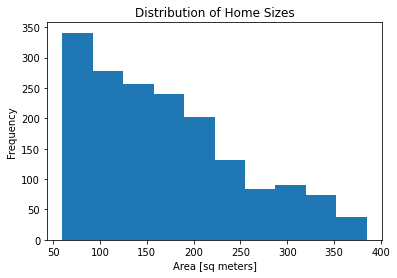

In [41]:
plt.hist(x = df['area_m2'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Sizes')

Text(0.5, 1.0, 'Distribution of Home Sizes')

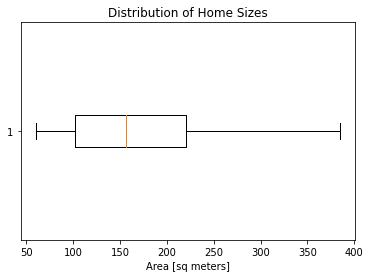

In [42]:
plt.boxplot(x = df['area_m2'], vert = False),
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Home Sizes')

### Price

Text(0.5, 1.0, 'Distribution of Home Prices')

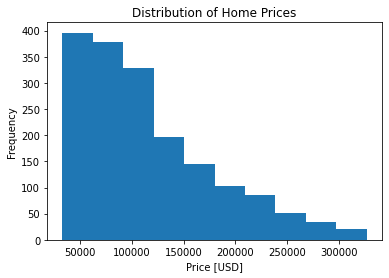

In [43]:
plt.hist(x=df['price_usd'])
plt.xlabel('Price [USD]')
plt.ylabel('Frequency')
plt.title('Distribution of Home Prices')

Text(0.5, 1.0, 'Distribution of Home Prices')

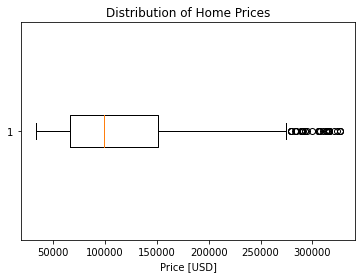

In [44]:
plt.boxplot(x = df['price_usd'], vert = False)
plt.xlabel('Price [USD]')
plt.title('Distribution of Home Prices')

`price_usd` looks more skewed to the left than `area`. In addition, `price_usd` also have more outliers (3 std away from the mean)